In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv('train_2kmZucJ.csv')
df1 = pd.read_csv('test_oJQbWVk.csv')

In [22]:
#Training data set
df.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


# Data pre-Processing

In [23]:
df.shape#checking the shape of data

(7920, 3)

In [24]:
df.dtypes#checking the datatypes of fields

id        int64
label     int64
tweet    object
dtype: object

In [25]:
df.isnull().sum()#counting the number of null

id       0
label    0
tweet    0
dtype: int64

In [26]:
# Testing data set
df1.head()# checking the head of Data Sets

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [27]:
import warnings 
warnings.filterwarnings('ignore')

In [28]:
# Data cleaning and processing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [30]:
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

In [31]:
b=len(df['tweet'])
print(b)

7920


In [32]:
corpus = []
for i in range(0, b):
    review = re.sub('[^a-zA-Z]', ' ', df['tweet'][i])
    review = review.lower()
    review = review.split( )
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize,stem
import re

In [37]:
vectorizer = CountVectorizer()

In [38]:
X = vectorizer.fit_transform(corpus)

In [39]:
# Tf-idf (Term frequency - Inverse document frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
cv = CountVectorizer(max_features=3000)

In [41]:
X = cv.fit_transform(corpus).toarray()

In [42]:
Y=df['label'].values

In [43]:
print("X train shape :-",X.shape)
print("Y train shape",Y.shape)

X train shape :- (7920, 3000)
Y train shape (7920,)


In [44]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [45]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [46]:
#hypermeter tunning using max_depths 
max_depths=[i for i in range(3,30,2)]
test_accuracy=[]
train_accuracy=[]
k=[]
count=0
for i in max_depths :
    count=count+1
    k.append(count)
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(xTrain, yTrain)
    train_accuracy.append((clf.score(xTrain, yTrain)))
    test_accuracy.append((clf.score(xTest,yTest)))


In [53]:
print("Test accuracy :-",test_accuracy[-1])

Test accuracy :- 0.8493265993265994


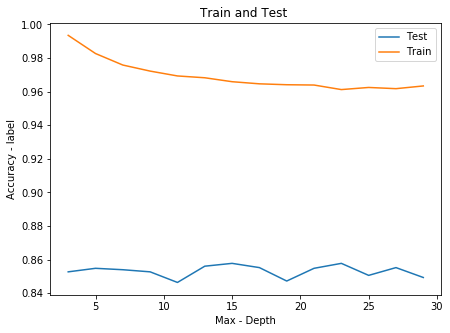

In [54]:
plt.figure(figsize=(7,5))
plt.plot(max_depths,test_accuracy,label='Test')
plt.plot(max_depths,train_accuracy,label='Train')
plt.xlabel("Max - Depth")
plt.ylabel("Accuracy - label")
plt.title("Train and Test ")
plt.legend()
plt.show()

In [55]:
#hypermeter tunning using max_depths 
min_samples_split=[i for i in range(3,30,2)]
test_accuracy=[]
train_accuracy=[]
k=[]
count=0
for i in min_samples_split :
    count=count+1
    k.append(count)
    clf = tree.DecisionTreeClassifier(min_samples_split=i)
    clf = clf.fit(xTrain, yTrain)
    train_accuracy.append((clf.score(xTrain, yTrain)))
    test_accuracy.append((clf.score(xTest,yTest)))

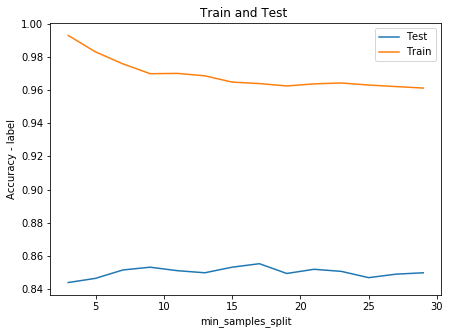

In [56]:
plt.figure(figsize=(7,5))
plt.plot(max_depths,test_accuracy,label='Test')
plt.plot(max_depths,train_accuracy,label='Train')
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy - label")
plt.title("Train and Test ")
plt.legend()
plt.show()

In [57]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score 

In [58]:
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=xTrain, y=yTrain, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.8493884784972018), (4, 0.8562420541239631), (5, 0.8632764621500605), (6, 0.8645368126700118), (7, 0.8676056939383088), (8, 0.8672444886590708), (9, 0.868688401089284), (10, 0.8694073991839841), (11, 0.8701282152272806), (12, 0.8697681478193798), (13, 0.8726541524307374), (14, 0.872294541666679), (15, 0.8706720748802778), (16, 0.870852675219424), (17, 0.8677872081402579), (18, 0.867965076668005), (19, 0.8672428935687728)]


In [31]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [60]:
model.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [61]:
y_predict = model.predict(xTest)

In [69]:
df1.head(10)

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
5,7926,#Repost @getbakednfried with repostapp ・・・ to ...
6,7927,This new apple software update is really doing...
7,7928,BABY #iPhone #iphone6s #gold #new #apple #appl...
8,7929,I'm confused...why did I have to take the time...
9,7930,Fruit just tastes better when you pick it your...


In [71]:
corpus1 = []
for i in range(0, len(df1['id'])):
    review = re.sub('[^a-zA-Z]', ' ', df1['tweet'][i])
    review = review.lower()
    review = review.split( )
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus1.append(review)

In [73]:
X1 = vectorizer.fit_transform(corpus1)

In [74]:
X1 = cv.fit_transform(corpus1).toarray()

In [76]:
y_predict1 = model.predict(X1)

In [97]:
predict_value=[]
for i in y_predict1 :
    predict_value.append(i)

In [105]:
df = pd.DataFrame(list(zip(df1['id'], predict_value)), columns =['id', 'label']) 

In [108]:
df.to_csv('Submission1.csv')